$$u(x, t)=\frac{2 P_0}{\rho A L} \sum_{n=1}^{\infty} \frac{1}{\omega_n^2-\omega^2} \sin \frac{n \pi a}{L} \sin \frac{n \pi x}{L} \sin \omega t $$

$$P (x, t) = P_0 \sin (ωt)$$

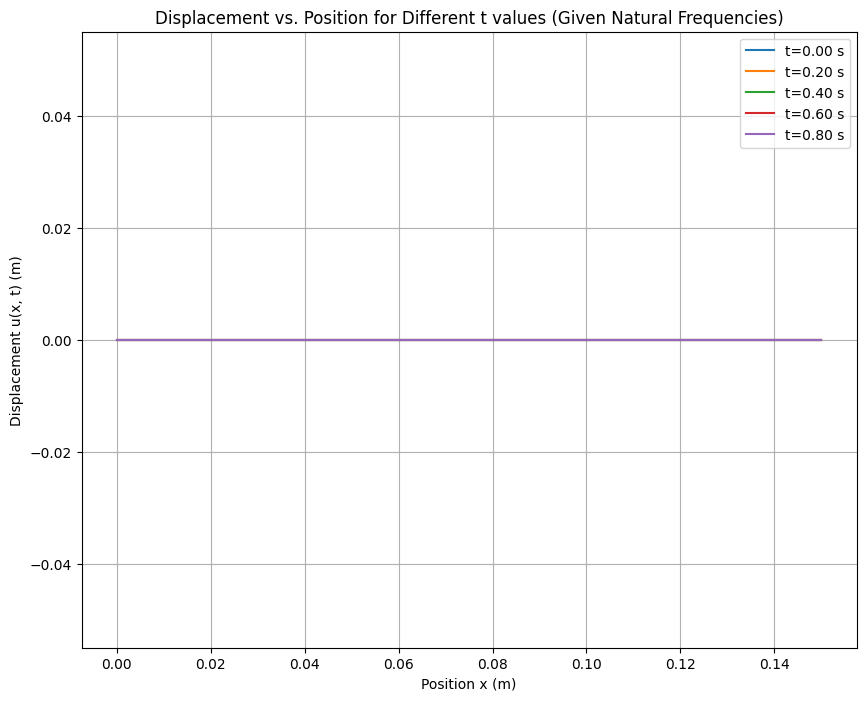

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constants and parameters
P0 = -10  # N
E_copper = 130e9  # Young's modulus in Pa
rho_copper = 8.96e3  # Density in kg/m^3
L = 0.15  # Length in meters
width = 0.03  # Width of cross-section in meters
height = 0.03  # Height of cross-section in meters
A = width * height  # Cross-sectional area
I = 6.75e-8

# Read omega_n_values from CSV
data = pd.read_csv('freq.csv', header=None)
omega_n_values = data.values.tolist()[0]
omega = 0.1 * omega_n_values[0] # Frequency in terms of ω1

# Calculate the exact solution for u(x, t) using given natural frequencies
def calculate_displacement_exact_given_frequencies(x, t, omega_n):
    displacement = 0.0
    a = L/2
    for i in range(1, len(omega_n)):
        term = 1 / (omega_n[i] ** 2 - omega ** 2) * \
               np.sin(np.pi * i * a / L) * \
               np.sin(np.pi * i * x / L) * \
               np.sin(omega * t)
        displacement += term
    return (2 * P0) / (rho_copper * A * L) * displacement

# Generate x values
x_values = np.linspace(0, L, 1000)  # Generating x values from 0 to L

# Specific times for displacement calculation
t_values = np.arange(0, 1, 0.2)  # Generating t values from 0 to 0.2 seconds with step 0.1 seconds

# Plotting for each t_value
plt.figure(figsize=(10, 8))
for t_value in t_values:
    displacements_exact = [calculate_displacement_exact_given_frequencies(x, t_value, omega_n_values) for x in x_values]
    plt.plot(x_values, displacements_exact, label=f"t={t_value:.2f} s")

plt.title("Displacement vs. Position for Different t values (Given Natural Frequencies)")
plt.xlabel("Position x (m)")
plt.ylabel("Displacement u(x, t) (m)")
plt.legend()
plt.grid(True)
plt.show()


$$ω_n=\sqrt{\frac{EI}{\rho A}}(\frac{n \pi}{L})^2=\sqrt{\frac{130\times 10^9 \cdot 6.75 \times 10^{-8}}{8.96 \times 10^3 \cdot 0.03^2}}(\frac{n \pi}{0.15})^2$$

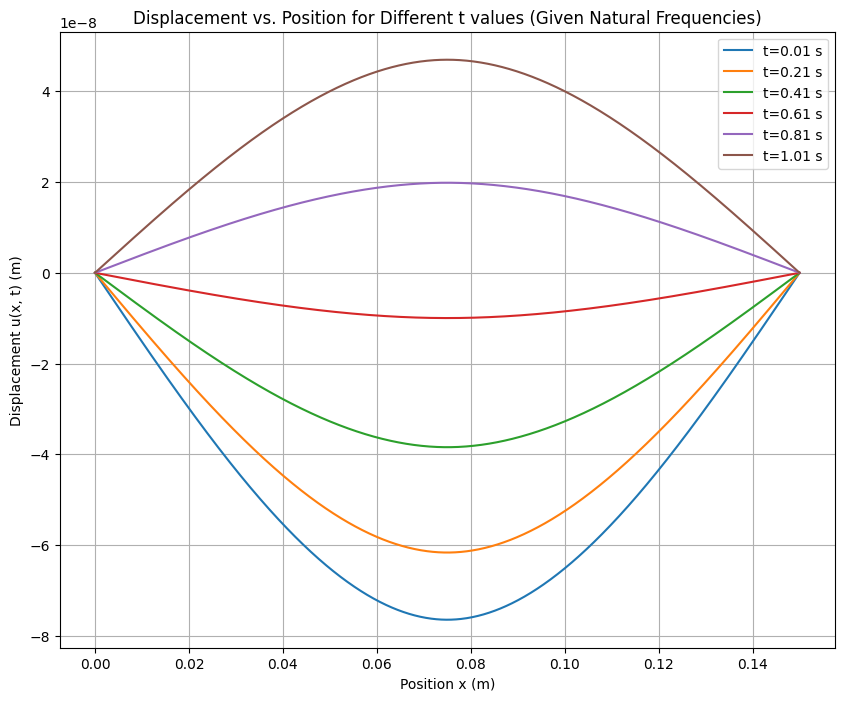

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constants and parameters
P0 = -10  # N
E_copper = 130e9  # Young's modulus in Pa
rho_copper = 8.96e3  # Density in kg/m^3
L = 0.15  # Length in meters
width = 0.03  # Width of cross-section in meters
height = 0.03  # Height of cross-section in meters
A = width * height  # Cross-sectional area
I = 6.75e-8

def calculate_omega_n(n, E, I, rho, A, L):
    return np.sqrt((E * I) / (rho * A)) * (n * np.pi / L)**2

omega = 0.1 * calculate_omega_n(1, E_copper, I, rho_copper, A, L) # Frequency in terms of ω1

# Calculate the exact solution for u(x, t) using given natural frequencies
def calculate_displacement_exact_given_frequencies(x, t, num_terms):
    displacement = 0.0
    a = L/2
    for i in range(1, num_terms + 1):
        term = 1 / (calculate_omega_n(i, E_copper, I, rho_copper, A, L) ** 2 - omega ** 2) * \
               np.sin(np.pi * i * a / L) * \
               np.sin(np.pi * i * x / L)  * np.sin(omega * t)
               
        displacement += term
    return (2 * P0) / (rho_copper * A * L) * displacement

# Generate x values
x_values = np.linspace(0, L, 1000)  # Generating x values from 0 to L

# Specific times for displacement calculation
t_values = np.arange(0.01, 1.1, 0.2)  # Generating t values from 0 to 0.2 seconds with step 0.1 seconds

# Plotting for each t_value
plt.figure(figsize=(10, 8))
for t_value in t_values:
    displacements_exact = [calculate_displacement_exact_given_frequencies(x, t_value, 500) for x in x_values]
    plt.plot(x_values, displacements_exact, label=f"t={t_value:.2f} s")

plt.title("Displacement vs. Position for Different t values (Given Natural Frequencies)")
plt.xlabel("Position x (m)")
plt.ylabel("Displacement u(x, t) (m)")
plt.legend()
plt.grid(True)
plt.show()
